In [6]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
actions = [
    '안녕하세요', '감사합니다', '사랑합니다', '어머니', '아버지', '동생', '잘', '못', '간다', '나',
    '이름', '만나다', '반갑다', '부탁', '학교', '생일', '월', '일', '나이', '복습', '학습', '눈치', '오다', '말', '곱다'
]

data = np.concatenate([
    np.load('dataset/seq_안녕하세요.npy'),
    np.load('dataset/seq_감사합니다.npy'),
    np.load('dataset/seq_사랑합니다.npy'),
    np.load('dataset/seq_어머니.npy'),
    np.load('dataset/seq_아버지.npy'),
    np.load('dataset/seq_동생.npy'),
    np.load('dataset/seq_잘.npy'),
    np.load('dataset/seq_못.npy'),
    np.load('dataset/seq_간다.npy'),
    np.load('dataset/seq_나.npy'),
    np.load('dataset/seq_이름.npy'),
    np.load('dataset/seq_만나다.npy'),
    np.load('dataset/seq_반갑다.npy'),
    np.load('dataset/seq_부탁.npy'),
    np.load('dataset/seq_학교.npy'),
    np.load('dataset/seq_생일.npy'),
    np.load('dataset/seq_월.npy'),
    np.load('dataset/seq_일.npy'),
    np.load('dataset/seq_나이.npy'),
    np.load('dataset/seq_복습.npy'),
    np.load('dataset/seq_학습.npy'),
    np.load('dataset/seq_눈치.npy'),
    np.load('dataset/seq_오다.npy'),
    np.load('dataset/seq_말.npy'),
    np.load('dataset/seq_곱다.npy')
], axis=0)

data.shape

(23036, 30, 226)

In [8]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(23036, 30, 225)
(23036,)


In [10]:
import numpy as np

print(np.max(labels))

56.0


In [11]:
from tensorflow.keras.utils import to_categorical

labels = np.where(labels == 56, 55, labels)
y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(23036, 56)

In [12]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(20732, 30, 225) (20732, 56)
(2304, 30, 225) (2304, 56)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                74240     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 56)                1848      
                                                                 
Total params: 78168 (305.34 KB)
Trainable params: 78168 (305.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/final.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=20, verbose=1, mode='auto'),
        EarlyStopping(monitor='val_acc', patience=30, verbose=1, restore_best_weights=True)
    ]
)

Epoch 1/200


648/648 [==============================] - ETA: 0s - loss: 1.9594 - acc: 0.4223
Epoch 1: val_acc improved from -inf to 0.68793, saving model to models\final.h5
648/648 [==============================] - 17s 22ms/step - loss: 1.9594 - acc: 0.4223 - val_loss: 0.9243 - val_acc: 0.6879 - lr: 0.0010
Epoch 2/200
  4/648 [..............................] - ETA: 10s - loss: 0.8926 - acc: 0.7031

c:\Users\junseok\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


646/648 [============================>.] - ETA: 0s - loss: 0.7156 - acc: 0.7582
Epoch 2: val_acc improved from 0.68793 to 0.82943, saving model to models\final.h5
648/648 [==============================] - 11s 17ms/step - loss: 0.7151 - acc: 0.7585 - val_loss: 0.4870 - val_acc: 0.8294 - lr: 0.0010
Epoch 3/200
647/648 [============================>.] - ETA: 0s - loss: 0.4218 - acc: 0.8518
Epoch 3: val_acc improved from 0.82943 to 0.89193, saving model to models\final.h5
648/648 [==============================] - 12s 18ms/step - loss: 0.4216 - acc: 0.8518 - val_loss: 0.3073 - val_acc: 0.8919 - lr: 0.0010
Epoch 4/200
648/648 [==============================] - ETA: 0s - loss: 0.3239 - acc: 0.8865
Epoch 4: val_acc improved from 0.89193 to 0.92925, saving model to models\final.h5
648/648 [==============================] - 15s 23ms/step - loss: 0.3239 - acc: 0.8865 - val_loss: 0.2142 - val_acc: 0.9293 - lr: 0.0010
Epoch 5/200
648/648 [==============================] - ETA: 0s - loss: 0.2370 -

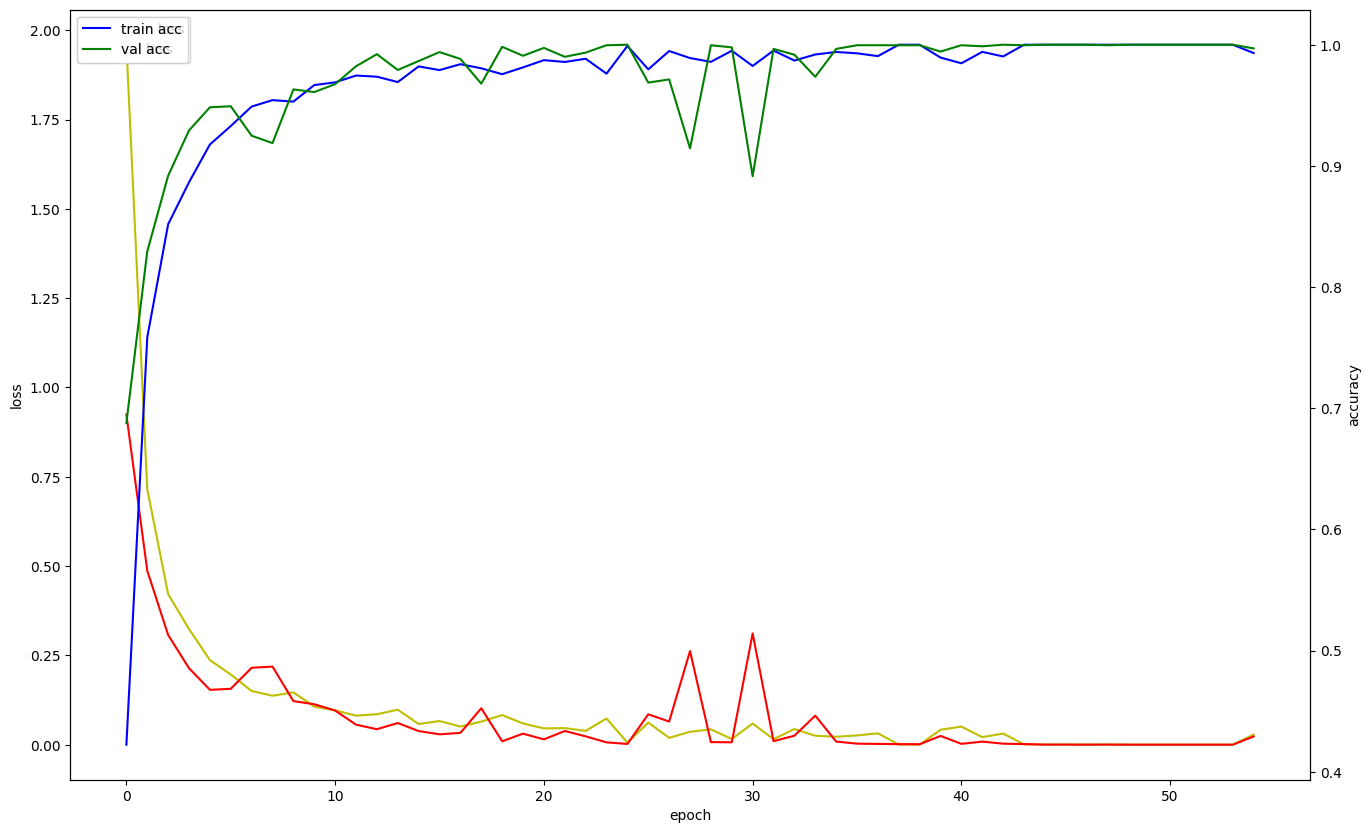

In [15]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [16]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/final.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

72/72 [==============================] - 1s 6ms/step


array([[[2265,    0],
        [   0,   39]],

       [[2261,    0],
        [   0,   43]],

       [[2269,    0],
        [   0,   35]],

       [[2263,    0],
        [   0,   41]],

       [[2249,    0],
        [   0,   55]],

       [[2258,    0],
        [   0,   46]],

       [[2264,    0],
        [   0,   40]],

       [[2265,    0],
        [   0,   39]],

       [[2273,    0],
        [   0,   31]],

       [[2269,    0],
        [   0,   35]],

       [[2264,    0],
        [   0,   40]],

       [[2261,    0],
        [   0,   43]],

       [[2265,    0],
        [   0,   39]],

       [[2258,    0],
        [   0,   46]],

       [[2264,    0],
        [   0,   40]],

       [[2269,    0],
        [   0,   35]],

       [[2267,    0],
        [   0,   37]],

       [[2259,    0],
        [   0,   45]],

       [[2274,    0],
        [   0,   30]],

       [[2270,    0],
        [   0,   34]],

       [[2263,    0],
        [   0,   41]],

       [[2268,    0],
        [   